# Galaxy Classification Machine Learning Project

### Exploring the data

In [ ]:
#Importing importatnt libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

#Reading the data
zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [ ]:
# The 1st column is a unique identifier,the 2nd and 3rd columns are absolute distance 
#so they cannot be used as features to our model 

In [3]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

In [ ]:
#Performing a classification task by plotting a bar graph to check class imbalance

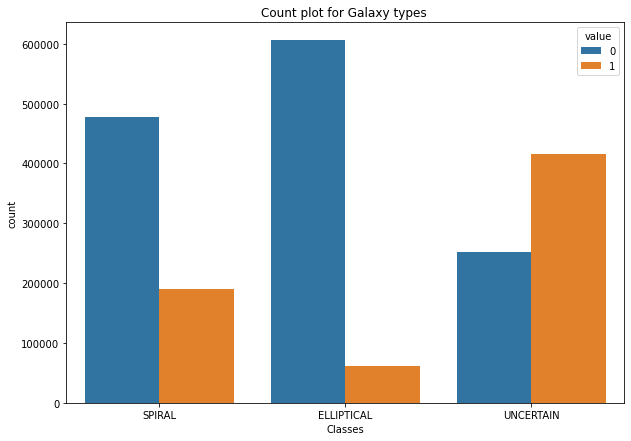

In [4]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

### Splitting The Data

In [5]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building Neural Network for Galaxy Classification Model

In [ ]:
#Sequential, in Keras, allows us to build the Multilayered Perceptron model from scratch.
#Adding each layer with  a unit number as parameter of Dense function

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from time import perf_counter
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = perf_counter()

### Fitting the data into neural network

In [7]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 29s 2ms/step - loss: 0.2835 - accuracy: 0.8786
Epoch 2/20
16699/16699 [==============================] - 28s 2ms/step - loss: 0.2513 - accuracy: 0.8924
Epoch 3/20
16699/16699 [==============================] - 24s 1ms/step - loss: 0.2471 - accuracy: 0.8941
Epoch 4/20
16699/16699 [==============================] - 24s 1ms/step - loss: 0.2449 - accuracy: 0.8951
Epoch 5/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2436 - accuracy: 0.8959
Epoch 6/20
16699/16699 [==============================] - 24s 1ms/step - loss: 0.2421 - accuracy: 0.8965
Epoch 7/20
16699/16699 [==============================] - 24s 1ms/step - loss: 0.2400 - accuracy: 0.8972
Epoch 8/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2388 - accuracy: 0.8975
Epoch 9/20
16699/16699 [==============================] - 32s 2ms/step - loss: 0.2381 - accuracy: 0.8979
Epoch 10/20
16699/16699 [==============================

In [ ]:
#Plotting the Accuracy of neural network at each epoch

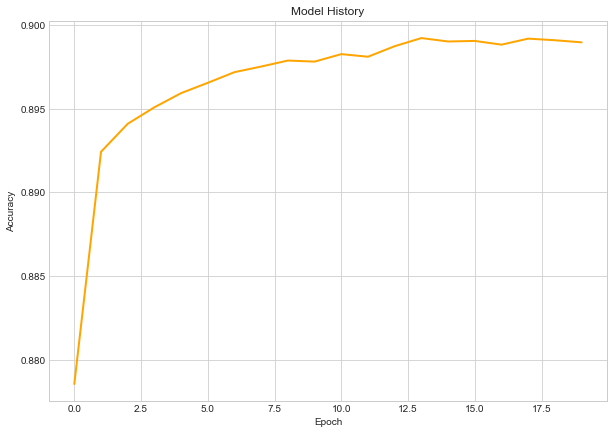

In [8]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='orange',lw=2)

In [ ]:
#From this graph it is is clear that after a certain epoch that is 6th epoch
#the precision remained constant

In [10]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
##Thank You 